# Predict Credit Default

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

%matplotlib inline

C:\Users\srema\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('../data/hmeq.csv')

In [3]:
df.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


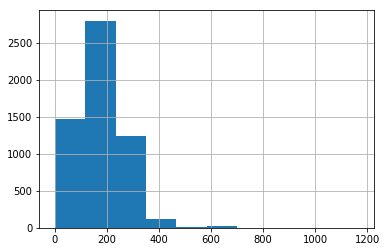

In [5]:
df['CLAGE'].hist()

In [6]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


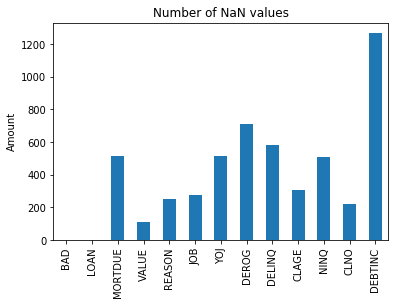

In [7]:
import matplotlib.pyplot as plt 

ax = df.isna().sum().plot.bar()
ax.set_ylabel('Amount')
plt.title('Number of NaN values');

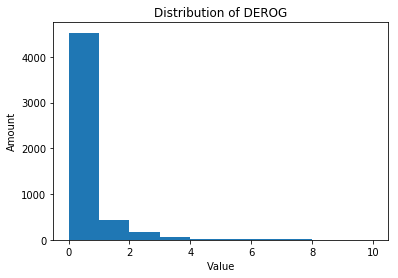

In [8]:
import matplotlib.pyplot as plt 

ax = df.DEROG.plot.hist()
ax.set_xlabel('Value')
ax.set_ylabel('Amount')
plt.title('Distribution of DEROG');

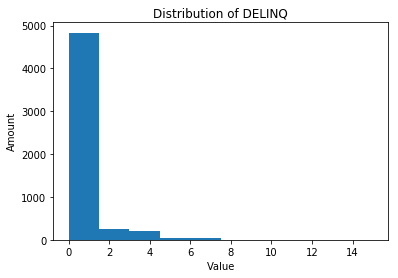

In [9]:
import matplotlib.pyplot as plt 

ax = df.DELINQ.plot.hist()
ax.set_xlabel('Value')
ax.set_ylabel('Amount')
plt.title('Distribution of DELINQ');

In [10]:
def fill_na_model(df, target):
    
    df_ = df.copy()
    
    X = df_.drop(['BAD', 'DEROG', 'DELINQ'], axis=1)
    y = df_[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    clf = GradientBoostingRegressor(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    return clf


def predict_na(df, target, clf=None):
    
    df_ = df.copy()
    
    df_train = df_[~df_[target].isna()]
    df_test = df_[df_[target].isna()]
    df_test_ = df_test.drop(columns=['BAD', 'DEROG', 'DELINQ'], axis=1)
    
    if clf == None:
        clf = fill_na_model(df_train, target)
        
    y_pred = clf.predict(df_test_)
    df_test[target] = y_pred
    df_new = pd.concat([df_train, df_test])
    
    return df_new, clf
    

In [11]:
def dummy_replace(df, column, prefix=None):
    
    df_ = df.copy()
    
    df_dummy = pd.get_dummies(df_[column], prefix=prefix)
    df_ = pd.concat([df_, df_dummy], axis=1)
    df_ = df_.drop(columns=[column], axis=1)
    
    return df_
   
def fill_nan(df): 
    
    df_ = df.copy()
    
    df_['MORTDUE'] = df_['MORTDUE'].fillna(df_['MORTDUE'].median())
    df_['VALUE'] = df_['VALUE'].fillna(df_['VALUE'].median())
    df_['REASON'] = df_['REASON'].fillna('Unknown')
    df_['JOB'] = df_['JOB'].fillna('Unknown')
    df_['YOJ'] = df_['YOJ'].fillna(df_['YOJ'].median())
    df_['CLAGE'] = df_['CLAGE'].fillna(df_['CLAGE'].median())
    df_['NINQ'] = df_['NINQ'].fillna(df_['NINQ'].median()) 
    df_['CLNO'] = df_['CLNO'].fillna(df_['CLNO'].median()) 
    df_['DEBTINC'] = df_['DEBTINC'].fillna(df_['DEBTINC'].median()) 
    
    df_['DEROG'] = df_['DEROG'].fillna(df_['DEROG'].mean()) 
    df_['DELINQ'] = df_['DELINQ'].fillna(df_['DELINQ'].mean()) 
    
    return df_


def data_cleaning(df, clf=None):
    
    df_ = df.copy()
    df_ = fill_nan(df_)


    df_ = dummy_replace(df_, 'REASON', prefix='Reason')
    df_ = dummy_replace(df_, 'JOB', prefix='Job')
    
#     df_, clf_derog = predict_na(df_, 'DEROG', clf=clf)
#     df_, clf_delinq = predict_na(df_, 'DELINQ', clf=clf)
    
    return df_

In [12]:
df_ = data_cleaning(df)

In [13]:
df_.head(5)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,Reason_DebtCon,Reason_HomeImp,Reason_Unknown,Job_Mgr,Job_Office,Job_Other,Job_ProfExe,Job_Sales,Job_Self,Job_Unknown
0,1,1100,25860.0,39025.0,10.5,0.00000,0.000000,94.366667,1.0,9.0,...,0,1,0,0,0,1,0,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.00000,2.000000,121.833333,0.0,14.0,...,0,1,0,0,0,1,0,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.00000,0.000000,149.466667,1.0,10.0,...,0,1,0,0,0,1,0,0,0,0
3,1,1500,65019.0,89235.5,7.0,0.25457,0.449442,173.466667,1.0,20.0,...,0,0,1,0,0,0,0,0,0,1
4,0,1700,97800.0,112000.0,3.0,0.00000,0.000000,93.333333,0.0,14.0,...,0,1,0,0,1,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X = df_.drop(['BAD'], axis=1)
y = df_['BAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


X_train = X_train.drop(['Reason_Unknown', 'Job_Unknown', 'Reason_HomeImp', 
                        'Job_Office'], axis=1)
X_train['Intercept'] = np.ones((len(X_train),1))

logit_mod = sm.Logit(y_train, X_train)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.373865
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 3993
Model:                          Logit   Df Residuals:                     3976
Method:                           MLE   Df Model:                           16
Date:                Mon, 15 Jun 2020   Pseudo R-squ.:                  0.2301
Time:                        22:24:28   Log-Likelihood:                -1492.8
converged:                       True   LL-Null:                       -1939.1
Covariance Type:            nonrobust   LLR p-value:                1.147e-179
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
LOAN           -1.831e-05   5.14e-06     -3.566      0.000   -2.84e-05   -8.25e-06
MORTDUE         -

In [18]:
# X_test = X_test.drop(['Reason_Unknown', 'Job_Unknown', 'Reason_HomeImp', 
#                         'Job_Office'], axis=1)
# X_test['Intercept'] = np.ones((len(X_test),1))

y_pred_s = logit_res.predict(X_test)

In [20]:
def plot_roc_curve(y_true, y_pred, model_name):
    
    fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1, drop_intermediate=True)
    roc_auc = auc(fpr, tpr)

    # plot ROC curve
    plt.plot(fpr, tpr, label="ROC curve %s (area = {:.2f})".format(roc_auc) %(model_name))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('Receiver-operating characteristic')
    plt.legend(loc="lower right")

    print("ROC %s: {:.4f}".format(roc_auc) %(model_name))
    
    return None

ROC Stepwise Model: 0.7957


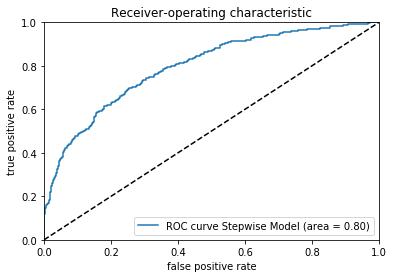

In [21]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

plot_roc_curve(y_test, y_pred_s,'Stepwise Model')

In [33]:
def Residuals(y_reference, predictions,Name):
    
    print(y_reference.shape, predictions.shape)
    #Calculate manually response residuals
    response_res = (y_reference - predictions)
    print(response_res)
    
    #Calculate manually pearson residuals 
    pearson_res = (y_reference - predictions)/np.sqrt(predictions*(1-predictions))
    
    # Calculate manually deviance residuals
    # Apply formula for deviance residuals
    dev_res = np.zeros(len(predictions))  
    dev_res2 = np.zeros(len(predictions)) 
    # pearson_res = (y_reference - pred_p)/np.sqrt(pred_p*(1-pred_p))
    for i in range(len(predictions)):
        if y_reference.iloc[i] == 1:
            dev_res[i] = np.sqrt(-2*np.log(predictions.iloc[i]))
        else:
            dev_res[i] = -np.sqrt(-2*np.log(predictions.iloc[i]))
    
    plt.plot(predictions,dev_res,"o",color='blue')
    plt.xlabel('Fitted Values')
    plt.ylabel('Deviance residuals')
    plt.title(Name)
    plt.savefig("../images/plots/" + Name + "-Deviance residuals.png")
    plt.show()
    
    plt.plot(predictions,pearson_res, "o",color='blue')
    plt.xlabel('Fitted Values')
    plt.ylabel('Pearson residuals')
    plt.title(Name)
    plt.savefig("../images/plots/" + Name +  "-Pearson residuals.png")
    plt.show()
    
    plt.plot(predictions,response_res, "o",color='blue')
    plt.xlabel('Fitted Values')
    plt.ylabel('Response residuals')
    plt.title(Name)
    plt.savefig("../images/plots/" + Name + "-Response residuals.png")
    plt.show()

(1967,) (1967,)
1344   -0.064866
625    -0.066915
5908   -0.162302
2991   -0.049800
1545   -0.060092
          ...   
4559   -0.181205
2767   -0.109677
5212   -0.122399
1293   -0.049543
5751   -0.664858
Length: 1967, dtype: float64


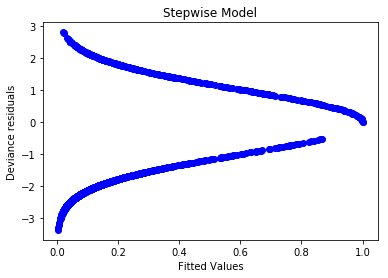

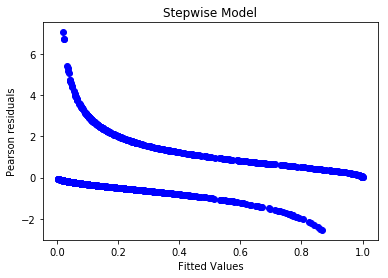

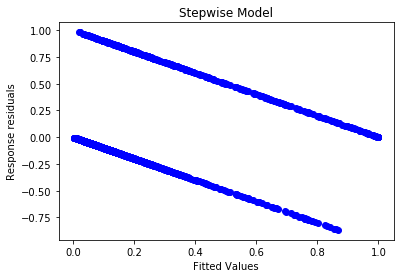

In [34]:
Residuals(y_test, y_pred_s,'Stepwise Model')

In [32]:
y_pred_s

1344    0.064866
625     0.066915
5908    0.162302
2991    0.049800
1545    0.060092
          ...   
4559    0.181205
2767    0.109677
5212    0.122399
1293    0.049543
5751    0.664858
Length: 1967, dtype: float64

In [180]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))

Accuracy score: 0.8723945094051856
F1 score: 0.6325036603221083
Precision score: 0.8605577689243028
Recall score: 0.5


In [178]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))

Accuracy score: 0.8937468225724453
F1 score: 0.7035460992907802
Precision score: 0.9084249084249084
Recall score: 0.5740740740740741


In [171]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))

Accuracy score: 0.9161159125571937
F1 score: 0.7376788553259142
Precision score: 0.90625
Recall score: 0.6219839142091153
